I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$ 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sp

In [12]:
#Para ángulos en radianes 
x = np.linspace(0,np.pi/2)

#Para ángulos en grados
x_deg = x*180/np.pi 

In [22]:
#Integramos 

#Primero damos un rango de límites de integración
a = 0 #Límite superior 
b = np.pi/2 #Límite inferior

def g(x, a, b):
  d = np.sin(0.5*x)
  return integrate.quad(lambda x: 1/(1 - d**2 * np.sin(x)**2)**0.5 , a, b)[0]

#En este punto se evalúa la integral para cada ángulo
integ = np.zeros(len(x))

for i in range(0, len(x)):
  integ[i] = g(x[i], a, b)

#Aquí calculamos el T/T0
T_T_0 = (2/np.pi)*integ

In [27]:
#Para el DataFrame

df = pd.DataFrame({'Ángulo-grados': x_deg, 'Ángulo-radianes': x, 'T/T0':T_T_0})
df[:6]

,Ángulo-grados,Ángulo-radianes,T/T0
0,0.000000,0.000000,1.000000
1,1.836735,0.032057,1.000064
2,3.673469,0.064114,1.000257
3,5.510204,0.096171,1.000578
4,7.346939,0.128228,1.001029
5,9.183673,0.160285,1.001608


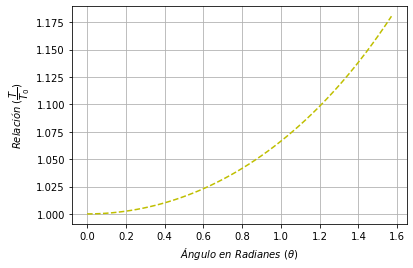

In [36]:
#Realizamos la gráfica 

plt.plot(x, T_T_0,'y--')
plt.xlabel('$Ángulo$ $en$ $Radianes$ $(θ)$')
plt.ylabel('$Relación$ $(\dfrac{T}{T_0}$)')
plt.grid()

Vemos que cuando el ángulo es igual a cero, el periodo no cambia.
Cabe anotar que esta relación es válida sólo para ángulos pequeños.

II)
### Casas-Ibarra parameterization
Consider a $n\times n$ symmetric matrix $A$. We can assumme without lost of generality that this can be generated from a matrix $Y$ such that
$$
A=Y^{\operatorname{T}}Y
$$
Theorem 1 gurantees that exists an ortogonal matrix $U$ such that
$$
U^{\operatorname{T}} A U=U^{\operatorname{T}} Y^{\operatorname{T}}Y U=D_\lambda
$$
where
$$
D_{\lambda}=A_{\text{diag}}=\operatorname{diag}\left(\lambda_1,\lambda_2,\ldots,\lambda_n\right)
$$
where $\lambda_i$ are the eigenvalues of $A$. Therefore
\begin{align}
 Y^{\operatorname{T}}Y =&U D_\lambda U^{\operatorname{T}}\\
 =&U D_{\sqrt{\lambda}} D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
\end{align}
where
$$
D_{\sqrt{\lambda}}=\operatorname{diag}\left(\sqrt{\lambda_1},\sqrt{\lambda_2},\ldots \sqrt{\lambda_n}\right)
$$
Therefore, exists an ortogonal arbitrary matrix $R$, such that
$$
 Y^{\operatorname{T}}Y =U D_{\sqrt{\lambda}}R^{\operatorname{T}}R D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
$$

In this way, the matrix $Y$ can be parameterized in terms of $R$ as
$$
Y=R D_{\sqrt{\lambda}} U^{\operatorname{T}}
$$


1) By using the previous equations, build a matrix $Y$ $2\times 2$ with the following conditions
* $R$ is an orthogonal matrix with a mixing angle as a random number between $(0,2\pi)$. Use your identification number as the seed of the random number generator.
* The eigenvalues are $\lambda_1=2$ and $\lambda_2=4$. 
* $U$ is a diagonalization matrix with mixing angle $\pi/4$

2) Build the matrix $A$ and check that has the proper eigenvalues and eigenvectors

In [54]:
sp.init_printing()

In [55]:
#Primero obtendremos el ángulo de mezcla
np.random.seed(1001030700) 
x = np.random.uniform(0,2*np.pi)
x

In [56]:
#Ahora definimos las matrices

y = np.diag([2,4]) #Matriz - Autovalores
z = np.sqrt(y) #Matriz - Raiz autovalores

U = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],[np.sin(np.pi/4), np.cos(np.pi/4)]])
R = np.array([[np.cos(x), -np.sin(x)],[np.sin(x), np.cos(x)]])

#Valor de Y
Y = np.dot( R, np.dot(R, np.transpose(U)) )
sp.Matrix(Y)

⎡0.603625587542606   0.797267928656261⎤
⎢                                     ⎥
⎣-0.797267928656261  0.603625587542606⎦

In [57]:
#Ahora calculamos A
A = np.dot(np.transpose(Y), Y)
sp.Matrix((A))

⎡         1.0           -2.04408282505857e-17⎤
⎢                                            ⎥
⎣-2.04408282505857e-17           1.0         ⎦

In [58]:
#Lo siguiente es hallar los autovectores y autovalores de A
E, e = np.linalg.eig(A)

#Autovectores
sp.Matrix(e.round(7))

⎡0.7071068  -0.7071068⎤
⎢                     ⎥
⎣0.7071068  0.7071068 ⎦

In [59]:
#Autovalores
sp.Matrix(np.diag(E) )

⎡1.0  0.0⎤
⎢        ⎥
⎣0.0  1.0⎦

In [60]:
np.dot(e,np.dot(np.diag(E), e.transpose()))

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

Podemos corroborar la certeza de la matriz notando que corresponden a los mismos valores que calculamos en A